# Example of reading Fed data

See https://www.federalreserve.gov/datadownload/ 

This example is not quite ready for automation because you have to figure out the correct URL to use.

In [32]:
# here's the URL:
url = "http://www.federalreserve.gov/datadownload/Output.aspx?rel=H15&series=bcb44e57fb57efbe90002369321bfb3f&lastObs=&from=&to=&filetype=csv&label=include&layout=seriescolumn"

In [2]:
import pandas as pd
import requests  # this package is for web requests

res = requests.get(url)

In [17]:
rows = res.text.split('\r\n')  # split the data on CRLF (\r\n) into individual rows

In [18]:
series = [r.split(',') for r in rows]  # for each row, split on comma

In [19]:
series[:10]  # take a look at what we have -- look at the first 10 lines

[['"Series Description"',
  '"Market yield on U.S. Treasury securities at 10-year   constant maturity',
  ' quoted on investment basis"'],
 ['"Unit:"', '"Percent:_Per_Year"'],
 ['"Multiplier:"', '"1"'],
 ['"Currency:"', '"NA"'],
 ['"Unique Identifier: "', '"H15/H15/RIFLGFCY10_N.B"'],
 ['"Time Period"', '"RIFLGFCY10_N.B"'],
 ['1962-01-02', '4.06'],
 ['1962-01-03', '4.03'],
 ['1962-01-04', '3.99'],
 ['1962-01-05', '4.02']]

In [28]:
cols = series[5]  # these will be our column names
cols

['"Time Period"', '"RIFLGFCY10_N.B"']

We see that the first 6 lines are various headers, with the column titles in row 6.
Also note the following:
- Column headers have double-quotes around them, so we'll have to make sure to include those below
- Values are strings, not numeric. We'll need to convert those to floats.
- Trial-and-error shows that some missing numeric values are indicated as "ND" which fail to convert.

In [29]:
numeric_series = []  # this will be our series with numeric strings converted to floating-point numbers.
no_data = 0          # let's count the number of instances where we fail to convert
for s in series[6:]: # iterate over the list of lists, starting at the first data row.
    year = s[0]      # each row is a list with two values: year and number
    try:             # use a try/except block to catch numeric conversion exceptions
        number = float(s[1]) 
    except:
        number = None # use None for missing value
        no_data += 1  # and count how many missing values we have.
    numeric_series.append([year, number])  # append these rows to our series
print(len(numeric_series), "successfully converted with", no_data, "missing values")

15040 successfully converted with 642 missing values


Now we'll load this list of observations, each itself a 2-element list, into the dataframe.
Above we identified the column headings. Use those for the dataframe column names.
Take a look at the head of the dataframe to see what the data looks like.

In [30]:
dataframe = pd.DataFrame(numeric_series, columns=cols)
dataframe.head()

,"""Time Period""","""RIFLGFCY10_N.B"""
0,1962-01-02,4.06
1,1962-01-03,4.03
2,1962-01-04,3.99
3,1962-01-05,4.02
4,1962-01-08,4.03


In [31]:
dataframe.describe()

,"""RIFLGFCY10_N.B"""
count,14398.000000
mean,6.143148
std,2.887723
min,1.370000
25%,4.070000
50%,5.900000
75%,7.790000
max,15.840000


Since the "Time Period" column consists of unique values (*year*-*month*-*day*), let's rename this column to be the row indeces.

Note that the column names include double-quotes: '"Time Period"' -- not 'Time Period'

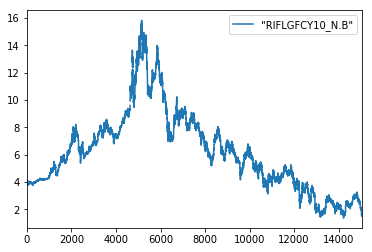

In [35]:
dataframe.plot();

The above has weird x-labels since they are the row number rather than the year-month-day. Let's fix this:

In [36]:
df_indexed = dataframe.set_index(keys='"Time Period"')  # N.B. the column headings have double-quotes around them
df_indexed.head()

,"""RIFLGFCY10_N.B"""
"""Time Period""",
1962-01-02,4.06
1962-01-03,4.03
1962-01-04,3.99
1962-01-05,4.02
1962-01-08,4.03


In [48]:
series[0]  # the 1st row contains the title of the series. Let's use that in our plot.

['"Series Description"',
 '"Market yield on U.S. Treasury securities at 10-year   constant maturity',
 ' quoted on investment basis"']

In [49]:
plot_title = ' '.join(series[0][1:])  # it looks like column 1 to the end is the series description.

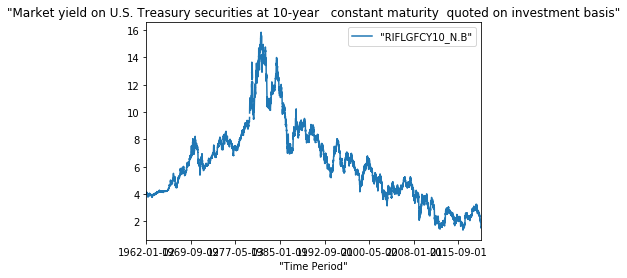

In [52]:
df_indexed.plot(title=plot_title);